In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#以下这个例子还是采用的线性回归，只是从原先的单层单个神经元，变为两层，第一隐藏层为10个神经元。所以用于解决特征类型的预判

In [3]:
data = pd.read_csv("./601398_1d.csv")
data

,Unnamed: 0,open,high,low,close,volume,money
0,2014-05-05,2.41,2.41,2.38,2.41,60777805.0,1.455491e+08
1,2014-05-06,2.41,2.41,2.38,2.39,69752898.0,1.674040e+08
2,2014-05-07,2.39,2.41,2.39,2.41,45107929.0,1.082613e+08
3,2014-05-08,2.39,2.43,2.39,2.41,58655820.0,1.416913e+08
4,2014-05-09,2.42,2.44,2.41,2.43,64827377.0,1.574709e+08
...,...,...,...,...,...,...,...
1598,2020-11-20,5.05,5.06,5.01,5.03,126572054.0,6.366256e+08
1599,2020-11-23,5.01,5.08,5.01,5.07,282580046.0,1.428218e+09
1600,2020-11-24,5.07,5.09,5.05,5.05,189318043.0,9.598792e+08
1601,2020-11-25,5.08,5.11,5.04,5.04,200292965.0,1.017148e+09


In [6]:

data.tail()

,Unnamed: 0,open,high,low,close,volume,money
1598,2020-11-20,5.05,5.06,5.01,5.03,126572054.0,6.366256e+08
1599,2020-11-23,5.01,5.08,5.01,5.07,282580046.0,1.428218e+09
1600,2020-11-24,5.07,5.09,5.05,5.05,189318043.0,9.598792e+08
1601,2020-11-25,5.08,5.11,5.04,5.04,200292965.0,1.017148e+09
1602,2020-11-26,5.04,5.10,5.03,5.09,197392278.0,1.002567e+09


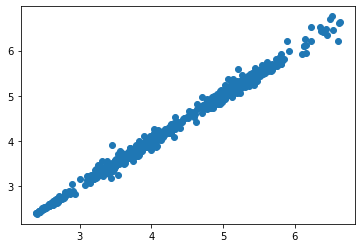

In [10]:
plt.scatter(data.open,data.close)

In [17]:
#这个只是示例，找不到其他数据，就拿手上的数据来
#根据open high low 来预测close

x = data.iloc[:,1:4]
y = data.iloc[:,4]


0       2.41
1       2.39
2       2.41
3       2.41
4       2.43
        ... 
1598    5.03
1599    5.07
1600    5.05
1601    5.04
1602    5.09
Name: close, Length: 1603, dtype: float64

In [18]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(10, input_shape=(3,), activation='relu'),    #第一层 输出10个隐藏神经单元, 输入数据为三个open、high、low
     tf.keras.layers.Dense(1)  #第二层，就是最后结果 close
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',loss='mse')

In [66]:
model.fit(x,y,epochs=1000)

Epoch 1/1000
51/51 [==============================] - 0s 878us/step - loss: 9.9390e-04
Epoch 2/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 3/1000
51/51 [==============================] - 0s 1ms/step - loss: 9.8206e-04
Epoch 4/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 5/1000
51/51 [==============================] - 0s 977us/step - loss: 0.0010
Epoch 6/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 7/1000
51/51 [==============================] - 0s 1ms/step - loss: 9.7788e-04
Epoch 8/1000
51/51 [==============================] - 0s 1ms/step - loss: 9.9568e-04
Epoch 9/1000
51/51 [==============================] - 0s 977us/step - loss: 0.0010
Epoch 10/1000
51/51 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11/1000
51/51 [==============================] - 0s 1ms/step - loss: 9.7866e-04
Epoch 12/1000
51/51 [==============================] - 0s 997us/step - loss: 0.00

In [67]:
test = data.iloc[-11:,1:4]
model.predict(test)

array([[5.033384 ],
       [4.9756384],
       [4.9889765],
       [4.9989896],
       [5.033819 ],
       [5.054217 ],
       [5.0385456],
       [5.074182 ],
       [5.081427 ],
       [5.083574 ],
       [5.089046 ]], dtype=float32)

In [68]:
data.iloc[-11:, 4]


1592    5.01
1593    4.96
1594    4.98
1595    5.00
1596    5.03
1597    5.04
1598    5.03
1599    5.07
1600    5.05
1601    5.04
1602    5.09
Name: close, dtype: float64

In [74]:
test2 = [5.29,5.48,5.28]

#test.append(test2,ignore_index=False)
test.loc[1604] = test2
model.predict(test)

array([[5.033384 ],
       [4.9756384],
       [4.9889765],
       [4.9989896],
       [5.033819 ],
       [5.054217 ],
       [5.0385456],
       [5.074182 ],
       [5.081427 ],
       [5.083574 ],
       [5.089046 ],
       [5.4368014],
       [4.7403007]], dtype=float32)